In [ ]:
! pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 5)

In [ ]:
!wget https://github.com/amueller/advanced_training/raw/master/data/adult.csv

--2023-03-24 16:08:22--  https://github.com/amueller/advanced_training/raw/master/data/adult.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/amueller/advanced_training/master/data/adult.csv [following]
--2023-03-24 16:08:22--  https://raw.githubusercontent.com/amueller/advanced_training/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3773638 (3.6M) [text/plain]
Saving to: ‘adult.csv’

adult.csv           100%[===================>]   3.60M  --.-KB/s    in 0.05s   

2023-03-24 16:08:23 (74.9 MB/s) - ‘adult.csv’ saved [3773638/3773638]



In [ ]:
data = pd.read_csv('adult.csv', index_col=0)
print(data.shape)
data.head()

(32561, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
size_before = data.shape[0]
(data.astype(str) == ' ?').any()

age               False
workclass          True
                  ...  
native-country     True
income            False
Length: 14, dtype: bool

In [ ]:
data = data[data.workclass != ' ?']
data = data[data.occupation != ' ?']
data = data[data['native-country'] != ' ?']

# data = data[np.logical_and(data.workclass != ' ?', data.occupation != ' ?')]

size_after = data.shape[0]

(data.astype(str) == '?').any()

age               False
workclass         False
                  ...  
native-country    False
income            False
Length: 14, dtype: bool

In [ ]:
size_after - size_before

-2399

In [ ]:
data.shape

(30162, 14)

Преобразуем наш целевой доход в двоичное значение (0 и 1).

In [ ]:
if 'income' in data.columns:
    y = (data['income'] == ' >50K').values.astype(np.int32)
    del data['income']
    
del data['native-country']
    
y.shape

(30162,)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

У нас есть некоторые категориальные данные в нашем наборе данных. Давайте использовать one-hot кодирование для этих столбцов. Чтобы автоматически преобразовать данные, вы должны использовать метод pd.get_dummies()

In [ ]:
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender'])
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
data.shape, y.shape

((30162, 62), (30162,))

In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

X = scale(data.astype(np.float))

<ipython-input-29-a874c4d57a8b>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = scale(data.astype(np.float))


In [ ]:
X.shape

(30162, 62)

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

X_val, X_test, y_val, y_test = \
    train_test_split(X_test, y_test, test_size=0.5, random_state=9, stratify=y_test)

In [ ]:
clf = DecisionTreeClassifier(max_depth =3)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
preds = clf.predict(X_val)

In [ ]:
preds_train = clf.predict(X_train)

In [ ]:
f1_score(y_train, preds_train)

0.6129776351419116

In [ ]:
f1_score(y_val, preds)

0.6235201262825573

In [ ]:
def get_test_train_errors(_adaboost):
    train_errors = []

    for y in _adaboost.staged_predict(X_train):
        train_errors.append(f1_score(y_train, y))

    test_errors = []

    for y in _adaboost.staged_predict(X_val):
        test_errors.append(f1_score(y_val, y))
        
    print('F1 validation score:', f1_score(y_val, _adaboost.predict(X_val)))
    
    plt.figure(figsize=(12, 8))
    plt.plot(train_errors, label='train')
    plt.plot(test_errors, label='test')
    plt.legend(loc='best')

## F1 score




$$F1 = 2 * (precision * recall) / (precision + recall)$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


F1 validation score: 0.7268817204301076


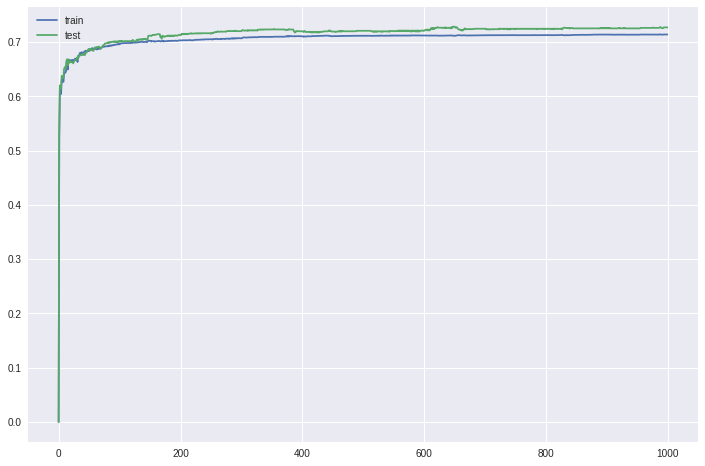

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000)
adaboost.fit(X_train, y_train)

get_test_train_errors(adaboost)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


F1 validation score: 0.7268817204301076


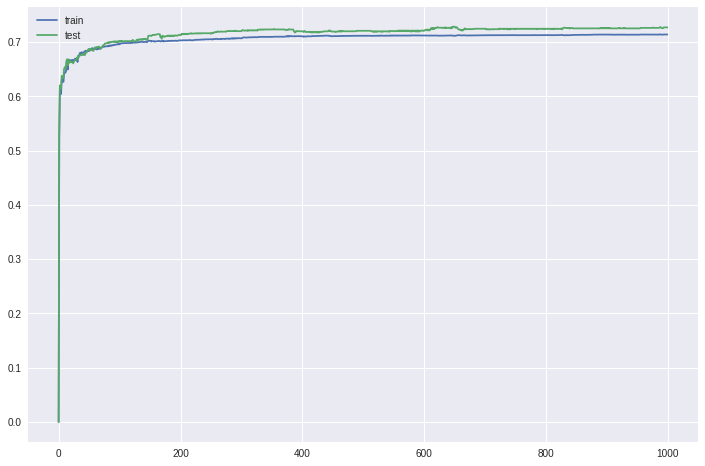

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000)
adaboost.fit(X_train, y_train)

get_test_train_errors(adaboost)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


F1 validation score: 0.663006177076184


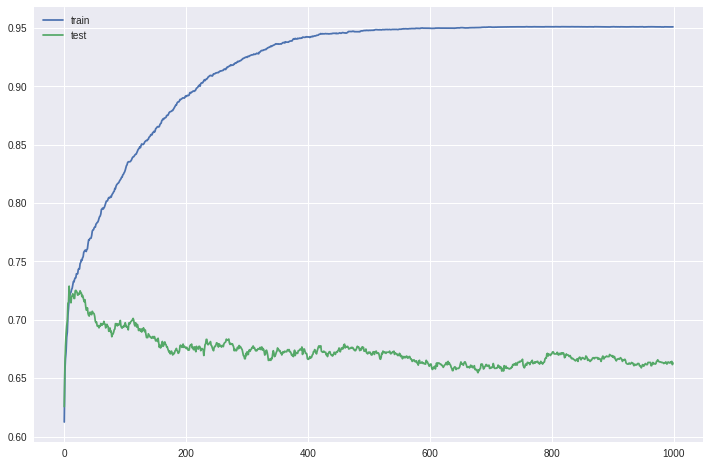

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=1000)
adaboost.fit(X_train, y_train)

get_test_train_errors(adaboost)